## Cell cycle lengths
### Figure 5, S5

In [6]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
from itertools import groupby
import matplotlib.pyplot as plt

In [7]:
txs = ["dmso", "e2wd", 
"brq500", "brq1", "brq2",
"hu25", "hu50", "hu100",
"aph500", "aph1", "aph2",
"ltx500", "ltx1", "ltx2",
"rosc16", "rosc31", "rosc625", "rosc125", "rosc25",
"tak313", "tak625", "tak125", "tak25", "tak5",
"a4_2", "a4_3", "a4_4", "b1_2", "b1_3", "b1_4",
"c3_2", "c3_3", "c3_4"]

# I obtained additional images in June 2023 -- took 4 images per well, originally only processed 1
# but for the samples without sufficient cells I got more 
# A4 is rosc 12.5
# B1 is rosc 25
# C3 is aph 2

# txs = ["dmso", "brq1", "hu50", "rosc125", "rosc25"]

In [8]:
def get_s_phases(arr):
    r = max(arr) - min(arr)
    thresh = min(arr) + .1 * r
    higher = (arr > thresh)

    i = 0
    res = []

    for k, g in groupby(higher):
        l = len(list(g))
        if k:
            res.append((i,i+l))
        i += l
    return(res)

In [9]:
stx_column = []
slen_column = []

gtx_column = []
g1len_column = []
for tx in txs:
    data = pd.read_csv("../data/bd396_data/" + tx + ".csv", header=None)
    # print(data.shape)
    # data.head()

    s_lengths = []
    g1_lengths = []
    for j in range(data.shape[0]):
        d = data.loc[j]
        # sns.lineplot(x=range(194), y=d)

        s_phases = get_s_phases(d)
        
        if len(s_phases) < 1: continue
        if s_phases[0][0] == 0:  # cell is already in s phase
            if len(s_phases) >= 2:  
                hrs = (s_phases[1][1]-s_phases[1][0] + 1)/4
                if hrs > 5 and hrs < 40: 
                    s_lengths.append(hrs)
                    
                    if len(s_phases) > 2:  # g1
                        hrs = (s_phases[2][0]-s_phases[1][1] + 1)/4
                        if hrs > 2: g1_lengths.append(hrs)
        else:  # cell is not in s phase
            hrs = (s_phases[0][1]-s_phases[0][0] + 1)/4
            if hrs > 5 and hrs < 40: 
                s_lengths.append(hrs)

                if len(s_phases) > 1:  # g1
                    hrs = (s_phases[1][0]-s_phases[0][1] + 1)/4
                    if hrs > 2: g1_lengths.append(hrs)         
            

    stx_column.extend([tx] * len(s_lengths))
    slen_column.extend(s_lengths)
    
    gtx_column.extend([tx] * len(g1_lengths))
    g1len_column.extend(g1_lengths)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'dmso'),
  Text(1, 0, 'e2wd'),
  Text(2, 0, 'brq500'),
  Text(3, 0, 'brq1'),
  Text(4, 0, 'brq2'),
  Text(5, 0, 'hu25'),
  Text(6, 0, 'hu50'),
  Text(7, 0, 'hu100'),
  Text(8, 0, 'aph500'),
  Text(9, 0, 'aph1'),
  Text(10, 0, 'aph2'),
  Text(11, 0, 'ltx500'),
  Text(12, 0, 'ltx1'),
  Text(13, 0, 'ltx2'),
  Text(14, 0, 'rosc16'),
  Text(15, 0, 'rosc31'),
  Text(16, 0, 'rosc625'),
  Text(17, 0, 'rosc125'),
  Text(18, 0, 'rosc25'),
  Text(19, 0, 'tak313'),
  Text(20, 0, 'tak625'),
  Text(21, 0, 'tak125'),
  Text(22, 0, 'tak25'),
  Text(23, 0, 'tak5'),
  Text(24, 0, 'a4_2'),
  Text(25, 0, 'a4_3'),
  Text(26, 0, 'a4_4'),
  Text(27, 0, 'b1_2'),
  Text(28, 0, 'b1_3'),
  Text(29, 0, 'b1_4'),
  Text(30, 0, 'c3_2'),
  Text(31, 0, 'c3_3'),
  Text(32, 0, 'c3_4')])

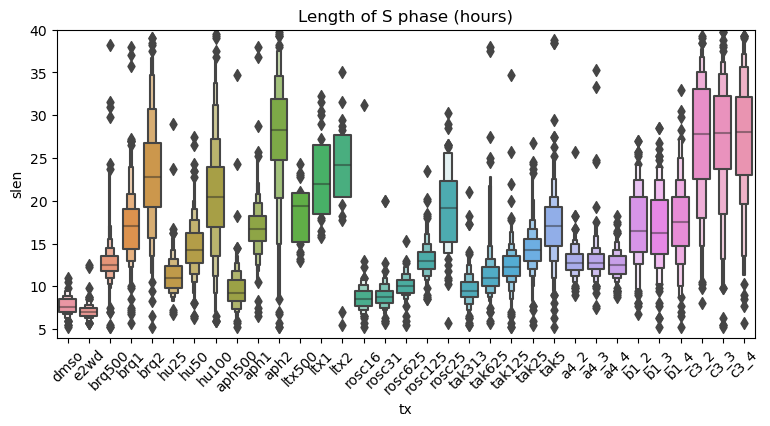

In [17]:
slength_df = pd.DataFrame({'tx': stx_column, 'slen': slen_column})

plt.figure(figsize=[9,4])
sns.boxenplot(data=slength_df, x="tx", y="slen")
plt.ylim([4, 40])
plt.title("Length of S phase (hours)")
#plt.hlines(7, 0, 4)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'dmso'),
  Text(1, 0, 'e2wd'),
  Text(2, 0, 'brq500'),
  Text(3, 0, 'brq1'),
  Text(4, 0, 'brq2'),
  Text(5, 0, 'hu25'),
  Text(6, 0, 'hu50'),
  Text(7, 0, 'hu100'),
  Text(8, 0, 'aph500'),
  Text(9, 0, 'aph1'),
  Text(10, 0, 'aph2'),
  Text(11, 0, 'ltx500'),
  Text(12, 0, 'ltx1'),
  Text(13, 0, 'ltx2'),
  Text(14, 0, 'rosc16'),
  Text(15, 0, 'rosc31'),
  Text(16, 0, 'rosc625'),
  Text(17, 0, 'rosc125'),
  Text(18, 0, 'rosc25'),
  Text(19, 0, 'tak313'),
  Text(20, 0, 'tak625'),
  Text(21, 0, 'tak125'),
  Text(22, 0, 'tak25'),
  Text(23, 0, 'tak5'),
  Text(24, 0, 'a4_2'),
  Text(25, 0, 'a4_3'),
  Text(26, 0, 'a4_4'),
  Text(27, 0, 'b1_2'),
  Text(28, 0, 'b1_3'),
  Text(29, 0, 'b1_4'),
  Text(30, 0, 'c3_2'),
  Text(31, 0, 'c3_3'),
  Text(32, 0, 'c3_4')])

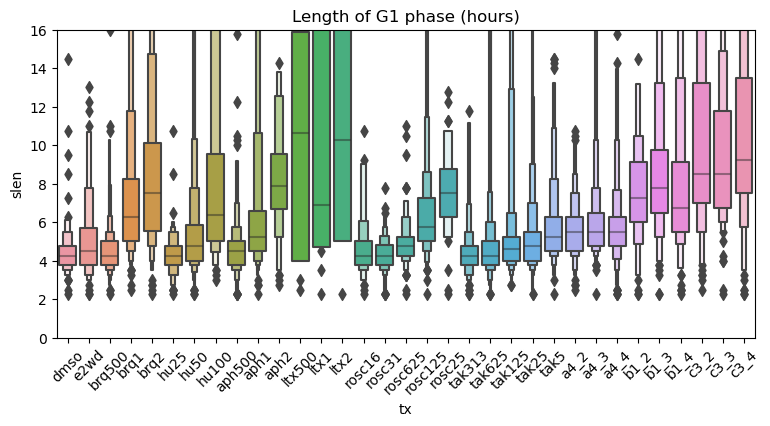

In [11]:
g1length_df = pd.DataFrame({'tx': gtx_column, 'slen': g1len_column})

plt.figure(figsize=[9,4])
sns.boxenplot(data=g1length_df, x="tx", y="slen")
plt.ylim([0, 16])
plt.title("Length of G1 phase (hours)")
#plt.hlines(7, 0, 4)
plt.xticks(rotation=45)

,slen
tx,
aph1,5.25
brq1,6.25
dmso,4.25
hu50,4.75


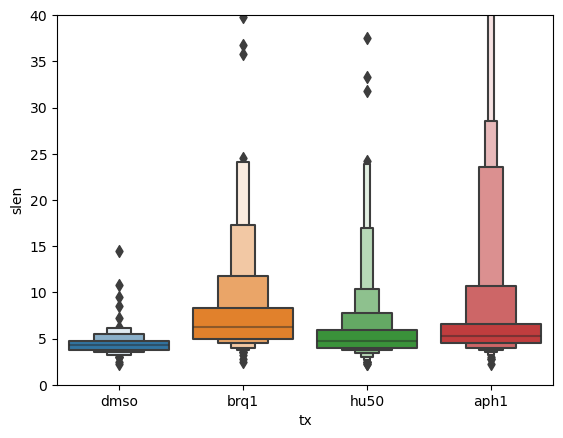

In [12]:
z = g1length_df[g1length_df.tx.isin(["dmso",  "brq1", "hu50", "aph1"])]
sns.boxenplot(data=z, x="tx", y="slen")
plt.ylim([0, 40])
z.groupby("tx").median()

In [13]:
z.to_csv("../output/231105_bd396_g1length.csv")

<Axes: xlabel='slen', ylabel='Count'>

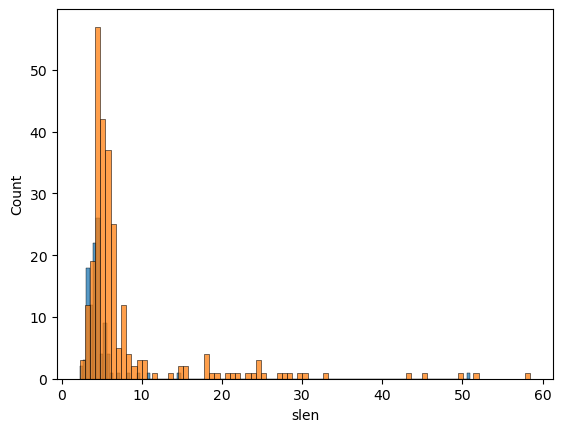

In [14]:
sns.histplot(g1length_df[g1length_df["tx"] == "dmso"].slen)
#sns.histplot(g1length_df[g1length_df["tx"] == "brq1"].slen)
sns.histplot(g1length_df[g1length_df["tx"] == "aph1"].slen)
# sns.histplot(g1length_df[g1length_df["tx"] == "aph1"].slen)


In [124]:
z[z.tx=="hu50"].slen.median()

4.75

In [18]:
slength_df.groupby(["tx"]).count()

,slen
tx,
a4_2,183
a4_3,163
a4_4,226
aph1,284
aph2,166
aph500,268
b1_2,99
b1_3,115
b1_4,133


In [19]:
slength_df.to_csv("../output/230612_bd396_sphase.csv")

## Developing the algorithm

13.758000000000001

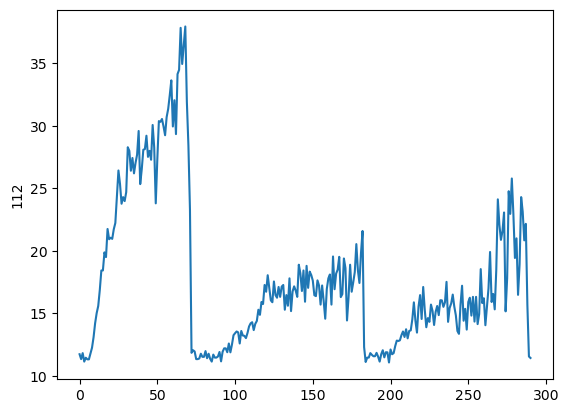

In [69]:
d = data.loc[112]
sns.lineplot(x=range(len(d)), y=d)
r = max(d) - min(d)
thresh = min(d) + .1*r
thresh

1 8.75 0.5
3 20.0 6.25
4 15.0 4.25
5 16.25 4.5
7 13.25 3.75
10 17.5 5.25
11 15.25 4.75
12 12.0 4.5
13 13.25 4.25
14 15.25 8.0
16 15.5 4.25
18 8.0 0.5
20 12.0 4.0
22 13.25 3.75
23 11.75 3.75
27 16.25 1.0
28 13.75 4.75
33 12.75 5.25
35 11.25 5.75
36 15.25 5.5
37 16.5 6.0
38 11.5 9.0
39 18.75 4.25
44 12.0 5.25
45 10.5 3.75
47 16.0 5.75
52 13.0 3.75
53 16.25 6.5
54 12.0 4.5
56 26.5 0.5
57 12.25 6.5
59 13.5 4.5
61 10.5 13.25
62 15.25 5.75
63 12.25 4.5
64 11.5 5.0
65 17.5 4.0
66 13.25 6.75
67 18.0 0.5
68 12.75 2.5
69 19.75 5.5
71 12.75 8.75
72 16.75 5.25
73 14.25 3.75
74 10.75 3.5
76 14.25 0.5
79 14.5 4.5
80 15.5 3.75
81 14.0 5.0
82 13.0 7.25
83 14.25 4.0
84 13.0 6.5
85 13.25 3.0
88 9.5 6.25
90 19.0 5.25
93 14.5 8.25
94 13.5 4.5
96 13.5 3.75
97 17.75 4.5
98 14.5 4.25
99 13.25 3.75
102 14.75 6.5
103 11.5 4.5
104 15.25 15.25
107 6.5 0.5
110 15.5 7.0
111 13.25 3.75
112 15.75 9.5
114 16.75 5.25
118 15.0 4.5
119 9.5 7.0
120 15.0 4.5
122 9.5 5.25
123 12.0 5.5
125 15.5 3.75
126 11.5 7.75
127 17.75 

<Axes: ylabel='Count'>

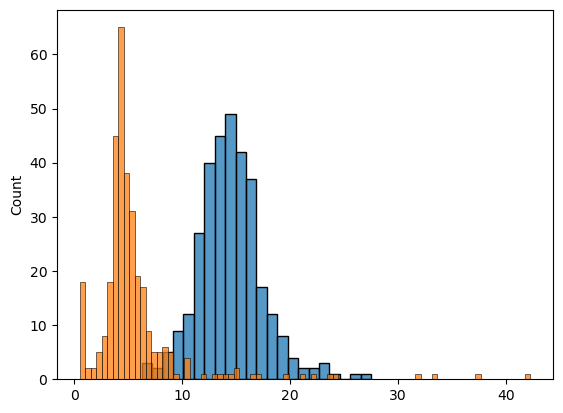

In [64]:
tx = "hu50"
data = pd.read_csv(tx + ".csv", header=None)

s_lengths = []
g1_lengths = []
for j in range(data.shape[0]):
    d = data.loc[j]
    # sns.lineplot(x=range(194), y=d)
    
    s_phases = get_s_phases(d)
    
    if len(s_phases) < 1: continue
    if s_phases[0][0] == 0:  # cell is already in s phase
        if len(s_phases) >= 2:  
            hrs = (s_phases[1][1]-s_phases[1][0] + 1)/4
            if hrs > 5 and hrs < 40: 
                s_lengths.append(hrs)

                if len(s_phases) > 2:  # g1
                    hrs1 = (s_phases[2][0]-s_phases[1][1] + 1)/4
                    g1_lengths.append(hrs1)
                    
                    print(j, hrs, hrs1)
    else:  # cell is not in s phase
        hrs = (s_phases[0][1]-s_phases[0][0] + 1)/4
        if hrs > 5 and hrs < 40: 
            s_lengths.append(hrs)

            if len(s_phases) > 1:  # g1
                hrs1 = (s_phases[1][0]-s_phases[0][1] + 1)/4
                g1_lengths.append(hrs1)  
                print(j, hrs, hrs1)

    

print(len(s_lengths))
print(np.median(s_lengths))
sns.histplot(s_lengths)

print(len(g1_lengths))
print(np.median(g1_lengths))
sns.histplot(g1_lengths)

<AxesSubplot:ylabel='3'>

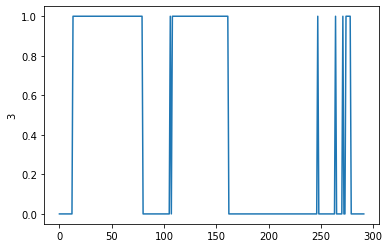

In [131]:
higher = (d > thresh)
sns.lineplot(x=range(292), y=higher)

In [22]:
# get first S phase that does not start in S phase

i = 0
res = []

for k, g in groupby(higher):
    l = len(list(g))
    if k:
        res.append((i,i+l))
    i += l


In [23]:
res

[(0, 5), (23, 49), (63, 89), (106, 134), (152, 193)]

In [ ]:
# 16, 17, 22 are edge cases we have to fix 

[(47, 48), (167, 168)]
[]


<AxesSubplot:ylabel='43'>

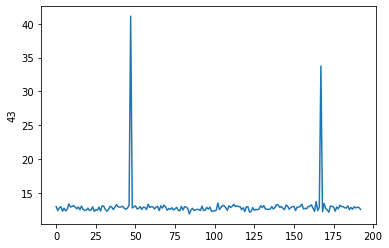

In [99]:
d = data.loc[43]
s_phases = get_s_phases(d)
print(s_phases)

s_lengths = []
if s_phases[0][0] == 0:
    if len(s_phases) >= 2:  # cell is already in s phase
        hrs = (s_phases[1][1]-s_phases[1][0] + 1)/4
        if hrs > 5 and hrs < 40: s_lengths.append(hrs)
else:  # cell is not in s phase
    hrs = (s_phases[0][1]-s_phases[0][0] + 1)/4
    if hrs > 5 and hrs < 40: s_lengths.append(hrs)
print(s_lengths)

sns.lineplot(x=range(194), y=d)
